# Estimating Monthly Rainfall Averages for S. Martino di Castrozza

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
os.chdir('DatiSanMartino')

In [2]:
os.listdir()

['pioggeSMartino_clean.csv',
 '.Rhistory',
 'sMartinoRainfallReadme.txt',
 'elabora2ric.R',
 'DailyRainfallSMartino',
 'elabora2ric copy.R',
 'DailyRainfallSMartino.fea',
 'LezioneIdrologia20200307.ipynb',
 '.Rapp.history',
 'pioggeSMartino_clean.numbers',
 '.ipynb_checkpoints']

In [3]:
dSm=pd.read_feather('DailyRainfallSMartino.fea')
dSm=dSm.set_index("Date")

In [4]:
monthly_precipitation_SM=dSm.resample("1MS")
mPT=monthly_precipitation_SM.sum()
mPT

,Rain[mm]
Date,
1921-01-01,102.0
1921-02-01,42.0
1921-03-01,19.2
1921-04-01,60.9
1921-05-01,122.0
...,...
1990-08-01,160.6
1990-09-01,111.6
1990-10-01,76.4


In [5]:
mPT.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='Date', length=840)

In [6]:
JanM=mPT[mPT.index.month==1]
JanM

,Rain[mm]
Date,
1921-01-01,102.0
1922-01-01,37.0
1923-01-01,80.0
1924-01-01,102.0
1925-01-01,7.0
...,...
1986-01-01,43.4
1987-01-01,40.6
1988-01-01,188.2


In [7]:
JanM.mean()

Rain[mm]    67.987143
dtype: float64

In [8]:
JanM.mean()[0]

67.98714285714286

In [9]:
mean_monthly_rainfall=[]
for month in range(1,13):
    mean_monthly_rainfall.append(mPT[mPT.index.month==month].mean()[0])
mean_monthly_rainfall    

[67.98714285714286,
 55.27857142857143,
 76.28714285714287,
 84.86,
 136.30285714285714,
 137.66857142857145,
 166.43714285714287,
 150.13285714285715,
 136.58857142857147,
 143.88571428571427,
 145.46571428571428,
 121.87142857142855]

In [10]:
sum(mean_monthly_rainfall)

1422.7657142857145

In [11]:
months=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

In [12]:
mr=pd.DataFrame([months,mean_monthly_rainfall]).T
mr.columns=["Month","Mean Precipitation [mm]"]
mr=mr.set_index("Month")
mr

,Mean Precipitation [mm]
Month,
JAN,67.987143
FEB,55.278571
MAR,76.287143
APR,84.86
MAY,136.302857
JUN,137.668571
JUL,166.437143
AUG,150.132857
SEP,136.588571


<AxesSubplot:xlabel='Month'>

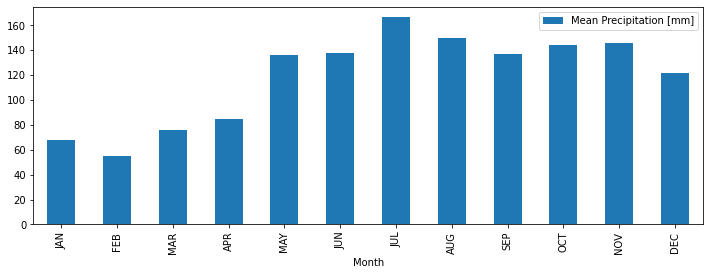

In [13]:
mr.plot(kind='bar',figsize=(12,4))